### Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

### Part I. Car sales: exploring the influence of price and other variables

#### We use here a dataset with sales data for cars of different manufacturers and models. The price is provided along with other variables describing the model.

#### 1. Load the dataset and look at the types of the columns. Check (and fix if needed) if the numerical variables are actually numbers.

In [2]:
data = pd.read_csv("data/car_sales.csv", na_values='.')

In [3]:
data.shape

(157, 15)

In [4]:
data.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15


#### 2. Find out the different values for type of vehicle, and get the means and standard deviations of the sales for each of these types.

In [5]:
data.groupby(['Vehicle type'])['Sales in thousands'].aggregate([np.mean, np.std])

,mean,std
Vehicle type,,
Car,80.622293,98.192626
Passenger,43.234345,50.557875


#### 3. Get the three manufacturers that offer more expensive models. You can get the mean of the price of the models per manufacturer for doing so.

In [6]:
g = data.groupby(['Model', 'Manufacturer']).agg({'Price in thousands': np.mean})
g.apply(lambda x: x.sort_values(ascending=False)).head()

,,Price in thousands
Model,Manufacturer,
CL500,Mercedes-Benz,85.500
SL-Class,Mercedes-Benz,82.600
Carrera Cabriolet,Porsche,74.970
Carrera Coupe,Porsche,71.020
Viper,Dodge,69.725


#### 4. Get the model of Nissan that gave more revenue (unit sold multiplied by price).

In [7]:
data['Manufacturer'] = data['Manufacturer'].str.strip() 
nissan = data.loc[data.Manufacturer == 'Nissan'].copy()
nissan['Revenue'] = nissan['Sales in thousands'] * nissan['Price in thousands']
g = nissan.groupby('Model').agg({'Revenue': np.sum})
g.apply(lambda x: x.sort_values(ascending=False)).head(1)

,Revenue
Model,
Maxima,2096.061397


#### 5. Compute and discuss the p-values of the correlation of horse power and engine size using two different methods. Take into account that you have to consider missing values in these two variables.

(0.8373597720234498, 3.096646940597215e-42)

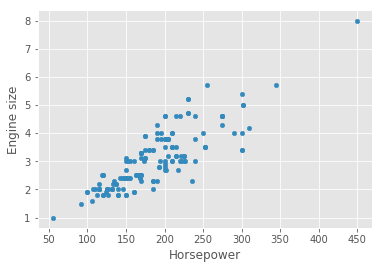

In [8]:
hp_es = data[['Horsepower', 'Engine size']].dropna().copy()
hp_es.plot.scatter(x = 'Horsepower', y = 'Engine size')
stats.pearsonr(x = hp_es['Horsepower'], y = hp_es['Engine size'])

#### 6. Plot the relation between price and engine size of for Nissan and Chevrolet in a grid with two subplots.

In [9]:
nissan = data.loc[data.Manufacturer == 'Nissan'].copy()
chevy = data.loc[data.Manufacturer == 'Chevrolet'].copy()

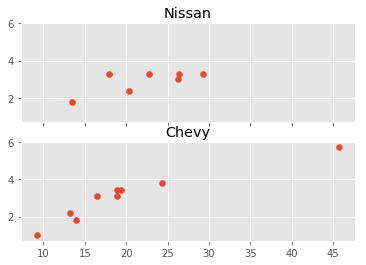

In [10]:
fig, ax = plt.subplots(nrows = 2, sharex = 'all', sharey = 'all')
ax[0].scatter(x = nissan['Price in thousands'], y = nissan['Engine size'],)
ax[0].title.set_text('Nissan')
ax[1].scatter(x = chevy['Price in thousands'], y = chevy['Engine size'])
ax[1].title.set_text('Chevy')
plt.show()

#### 7. Check graphically with a plot if there is a difference in mean fuel capacity of the vehicles of the different types.

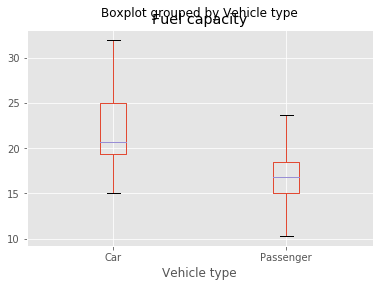

In [11]:
data.boxplot(by = 'Vehicle type', column = 'Fuel capacity')

#### 8. Check also the previous difference with a statistical test.

In [12]:
g = data.groupby(['Vehicle type'])
g['Fuel capacity'].quantile([0.00, 0.25, 0.50, 0.75, 1.00]).unstack()

,0.0,0.25,0.5,0.75,1.0
Vehicle type,,,,,
Car,15.1,19.4,20.7,25.025,32.0
Passenger,10.3,15.0,16.8,18.500,23.7


### Part II. Exploring car sales across countries

#### We explore here data from the International Organization of Motor Vehicle Manufacturers (http://www.oica.net/category/sales-statistics/). They provide the overall numbers by country.

#### 1. Load the data and do some basic inspection. Hint: check the format of the file, including delimiters, where the column header starts, and skip previous rows with no information. Check that the data has the correct datatypes.

In [13]:
data = pd.read_excel("data/Sales-all-vehicles-2017.xlsx", skiprows = 4, header = 1)

In [14]:
data.shape

(160, 17)

In [15]:
data.head(10)

,REGIONS/COUNTRIES,Unnamed: 1,Unnamed: 2,Unnamed: 3,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUROPE,NaN,NaN,NaN,21063326.0,21863840.0,23006722.0,21872430.0,18645351.0,18808688.0,19740019.0,18663178.0,18343409.0,18587650.0,19035989.0,20134829.0,2.091603e+07
2,EU 28 countries + EFTA,NaN,NaN,NaN,18186036.0,18516490.0,18870211.0,17385906.0,16226713.0,15665090.0,15664437.0,14358331.0,14136041.0,14995361.0,16454281.0,17568449.0,1.814764e+07
3,EU 15 countries + EFTA,NaN,NaN,NaN,16942079.0,17161729.0,17297311.0,15813252.0,15228050.0,14696720.0,14683816.0,13419914.0,13191331.0,13913189.0,15223766.0,16145220.0,1.656383e+07
4,AUSTRIA,NaN,NaN,NaN,345593.0,347387.0,339691.0,336000.0,350429.0,362564.0,396655.0,374829.0,357892.0,342215.0,349597.0,374545.0,4.035795e+05
5,BELGIUM,NaN,NaN,NaN,551501.0,594454.0,602365.0,612692.0,536260.0,607497.0,643511.0,550519.0,547139.0,545255.0,571524.0,617854.0,6.341113e+05
6,DENMARK,NaN,NaN,NaN,211159.0,226339.0,226214.0,191169.0,131788.0,173566.0,198518.0,199147.0,210839.0,221713.0,245484.0,265386.0,2.633615e+05
7,FINLAND,NaN,NaN,NaN,168121.0,166673.0,147842.0,160998.0,103016.0,126396.0,144425.0,126505.0,117368.0,120113.0,123483.0,136430.0,1.383750e+05
8,FRANCE,NaN,NaN,NaN,2598183.0,2544165.0,2629186.0,2614829.0,2718599.0,2708884.0,2687052.0,2331731.0,2207373.0,2210927.0,2345092.0,2478472.0,2.604942e+06
9,GERMANY,NaN,NaN,NaN,3614886.0,3772394.0,3482279.0,3425039.0,4049353.0,3198416.0,3508454.0,3394002.0,3257718.0,3356718.0,3539825.0,3708867.0,3.811246e+06


#### 2. Look at the data and check if there are columns or rows with no data. You can use for columns for example the function drop().

In [16]:
toDrop = ['Unnamed: 1','Unnamed: 2','Unnamed: 3']
data.drop(columns = toDrop, inplace = True)

In [17]:
data.dropna(inplace = True)

#### 3. Remove from the dataframe the information that is aggregated, e.g. "EUROPE", "EU 28 countries + EFTA", etc. Retain only rows in which there is data on a single country. Remove also rows with no data if any

In [18]:
labels = ["EUROPE", "EU 28 countries + EFTA", "EU 15 countries + EFTA", "ALL COUNTRIES",
         "ASIA/OCEANIA/MIDDLE EAST", "EUROPE NEW MEMBERS", "AMERICA", "NAFTA", "CENTRAL & SOUTH AMERICA",
         "RUSSIA, TURKEY & OTHER EUROPE"]
data.set_index("REGIONS/COUNTRIES", inplace=True)
data.drop(labels, inplace=True)

#### 4. Plot the series of data of the mean of all countries, together with the data only for Spain. Something like this:

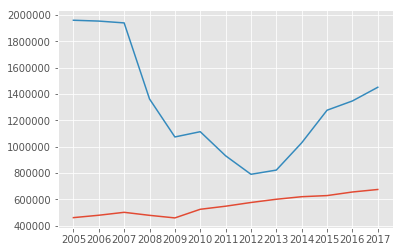

In [19]:
data.columns = data.columns.astype(str)
plt.plot(data.mean(axis=0))
plt.plot(data.loc["SPAIN"])

#### 5. Get the three countries in which sales have been greater in the period starting 2008 and ending the latest year available.

In [20]:
data.loc[:, "2008":].transpose().sum().sort_values(ascending=False)[:3]

REGIONS/COUNTRIES
CHINA                       2.061942e+08
UNITED STATES OF AMERICA    1.497154e+08
JAPAN                       5.042172e+07
dtype: float64

#### 6. Generate a categorical column with two values: "PIGS", "NORTHERN" and "OTHER" that marks the following: 
* South EU countries: Spain, Portugal, Italy and Greece.
* North EU countries: Finland, Sweden, Norway.
* Rest of the countries.
#### You must use a function for doing so, and no loops

In [21]:
south = ["SPAIN", "GREECE", "ITALY", "PORTUGAL"]
north = ["FINLAND", "NORWAY", "SWEDEN"]
def tx(x):
    if x in south:
        return "SOUTH"
    elif x in north:
        return "NORTHERN"
    else:
        return "OTHER"
data["kind"] = np.vectorize(tx)(data.index.values)

#### 7. Use that new column to plot the average sales of the three groups. Something like this:

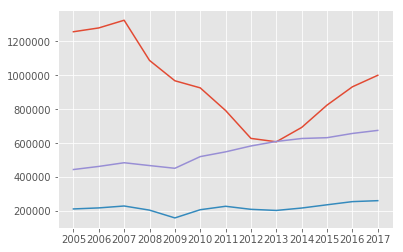

In [22]:
bykind = data.groupby("kind")
plt.plot(bykind.get_group("SOUTH").mean())
plt.plot(bykind.get_group("NORTHERN").mean())
plt.plot(bykind.get_group("OTHER").mean())